## Sprint 21 - Natural Language Processing

In [3]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar zxf aclImdb_v1.tar.gz
!rm -rf aclImdb/train/unsup
!cat aclImdb/README

--2020-08-05 21:24:25--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu... 171.64.68.10
Connecting to ai.stanford.edu|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: 'aclImdb_v1.tar.gz'

aclImdb_v1.tar.gz   100%[===================>]  80.23M  2.53MB/s    in 38s     

2020-08-05 21:25:03 (2.11 MB/s) - 'aclImdb_v1.tar.gz' saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents

In [4]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
print(train_review.target_names)

['neg', 'pos']


In [5]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [6]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [8]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## Problem 1

- 1-gram

In [9]:
first = 'This movie is SOOOO funny!!!'.split()
second = 'What a movie! I never'.split()
third = 'best movie ever!!!!! this movie'.split()

first = [s.lower().replace('!', '') for s in first]
second = [s.lower().replace('!', '') for s in second]
third = [s.lower().replace('!', '') for s in third]

gram_1_all = first + second + third

In [12]:
import numpy as np
gram_1 = pd.DataFrame(np.zeros((3, len(set(gram_1_all)))).astype('int'), columns=set(gram_1_all))

gram_1_list = [first, second, third]
for i, ss in enumerate(gram_1_list):
    for s in ss:
        n = ss.count(s)
        gram_1[s][i] = n
        
gram_1

,is,funny,what,soooo,this,a,i,best,ever,never,movie
0,1,1,0,1,1,0,0,0,0,0,1
1,0,0,1,0,0,1,1,0,0,1,1
2,0,0,0,0,1,0,0,1,1,0,2


- 2-gram

In [14]:
gram_2_all  = []
gram_2_list = []
for s in gram_1_list:
    lis = []
    for i in range(len(s)-1):
        gram_2_all.append(f'{s[i]} {s[i+1]}')
        lis.append(f'{s[i]} {s[i+1]}')
    
    gram_2_list.append(lis)

In [15]:
gram_2 = pd.DataFrame(np.zeros((3, len(set(gram_2_all)))).astype('int'), columns=set(gram_2_all))

for i, ss in enumerate(gram_2_list):
    for s in ss:
        n = ss.count(s)
        gram_2[s][i] = n
        
gram_2

,i never,best movie,movie ever,ever this,movie is,soooo funny,what a,this movie,is soooo,movie i,a movie
0,0,0,0,0,1,1,0,1,1,0,0
1,1,0,0,0,0,0,1,0,0,1,1
2,0,1,1,1,0,0,0,1,0,0,0


- TF-IDF

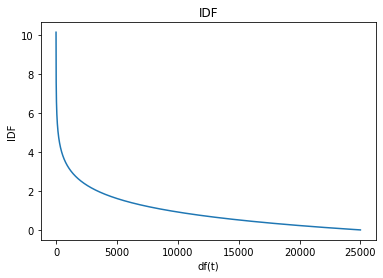

In [17]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [18]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [20]:
#NLTK
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diopmouhamed/nltk_data...


stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## Problem 2

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train = (vectorizer_train.fit_transform(x_train))
vec = vectorizer_train.get_feature_names()

vectorizer_test = TfidfVectorizer(stop_words=stop_words,
                                  max_features=5000,
                                  vocabulary=vec)
X_test = vectorizer_test.fit_transform(x_test)
print(X_train.shape, X_test.shape)

(25000, 5000) (25000, 5000)


## Problem 3

In [23]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier().fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("{}".format(lgb.score(X_test, y_test)))
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.86004
0.853118870145155
0.86984
0.8613982966924144
[[10628  1872]
 [ 1627 10873]]


## Problem 4

- Standard Formula

In [26]:
tf = gram_1.copy()
idf = gram_1.copy()

for i in range(len(tf)):
    tf.iloc[i, :] = tf.iloc[i, :] / tf.iloc[i, :].sum()
    
for t in idf.columns:
    idf[t][:] = np.log(len(idf.columns) / idf[t].sum())

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
tf

,is,funny,what,soooo,this,a,i,best,ever,never,movie
0,0.2,0.2,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.2
1,0.0,0.0,0.2,0.0,0.0,0.2,0.2,0.0,0.0,0.2,0.2
2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.2,0.0,0.4


In [28]:
idf

,is,funny,what,soooo,this,a,i,best,ever,never,movie
0,2.397895,2.397895,2.397895,2.397895,1.704748,2.397895,2.397895,2.397895,2.397895,2.397895,1.011601
1,2.397895,2.397895,2.397895,2.397895,1.704748,2.397895,2.397895,2.397895,2.397895,2.397895,1.011601
2,2.397895,2.397895,2.397895,2.397895,1.704748,2.397895,2.397895,2.397895,2.397895,2.397895,1.011601


In [29]:
tf * idf

,is,funny,what,soooo,this,a,i,best,ever,never,movie
0,0.479579,0.479579,0.000000,0.479579,0.34095,0.000000,0.000000,0.000000,0.000000,0.000000,0.20232
1,0.000000,0.000000,0.479579,0.000000,0.00000,0.479579,0.479579,0.000000,0.000000,0.479579,0.20232
2,0.000000,0.000000,0.000000,0.000000,0.34095,0.000000,0.000000,0.479579,0.479579,0.000000,0.40464


- Formula adopted by scikit-learn

In [30]:
tf_2 = gram_1.copy()
idf_2 = gram_1.copy()

for t in idf.columns:
    idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [31]:
tf_2 * idf_2

,is,funny,what,soooo,this,a,i,best,ever,never,movie
0,1.381543,1.381543,0.000000,1.381543,1.674285,0.000000,0.000000,0.000000,0.000000,0.000000,2.089949
1,0.000000,0.000000,1.381543,0.000000,0.000000,1.381543,1.381543,0.000000,0.000000,1.381543,2.089949
2,0.000000,0.000000,0.000000,0.000000,1.674285,0.000000,0.000000,1.381543,1.381543,0.000000,4.179898


In [32]:
!pip install gensim

     |████████████████████████████████| 24.2MB 3.9MB/s eta 0:00:01    |███████▊                        | 5.8MB 98kB/s eta 0:03:06     |███████████████████████████▉    | 21.0MB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 122kB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 133kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 71kB 3.4MB/s eta 0:00:011
     |████████████████████████████████| 6.5MB 1.6MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.0-cp37-none-any.whl size=110319 sha256=7f3c82735aaef4a69b71cd22008a69889504f6f06d067d81d003ae3b5ecf7f56
  Stored in directory: /Users/diopmouhamed/Library/Caches/pip/wheels/25/6c/db/7dcb26f19fb260c5629af85ed1c8ef9641143444fc7ec1fa08
Successfully built smart-open


In [33]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) 
model.build_vocab(sentences) 
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) 
print("List of vocabulary: {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
    print("Vector of {} : \n{}".format(vocab, model.wv[vocab]))

List of vocabulary: dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
Vector of this : 
[-0.03846292  0.04551623 -0.03332471 -0.04252932 -0.03062297  0.01650657
 -0.03368527 -0.03268282  0.02649088 -0.04647775]
Vector of movie : 
[ 0.043164    0.03326549 -0.04342645  0.01879135 -0.02225664 -0.017008
  0.01921584 -0.02380458 -0.00926294 -0.04241936]
Vector of is : 
[-0.0261138   0.01805291  0.04664908 -0.010152    0.02375114 -0.03711154
  0.01883607  0.0362896  -0.02670297 -0.02779392]
Vector of very : 
[ 0.04006131  0.04334307  0.00686985 -0.04044053 -0.00031693 -0.02255407
  0.00060548 -0.04330408  0.00320572 -0.01898312]
Vector of good : 
[ 0.00719756  0.01509543 -0.019727    0.02512015 -0.0084928  -0.01313411
  0.04350618  0.02552604  0.04288351  0.04628338]
Vector of film : 
[ 0.0093612  -0.0327603   0.0419189  -0.04767568 -0.01804223  0.00699206
 -0.02432043  0.00319532 -0.03569939 -0.0135851 ]
Vector of a : 
[-0.00078242 -0.0043831   0.04168001  0.01118625 -0

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [35]:
model.wv.most_similar(positive="good", topn=3)

[('bad', 0.3160766065120697),
 ('movie', 0.05001020431518555),
 ('is', -0.181209534406662)]

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


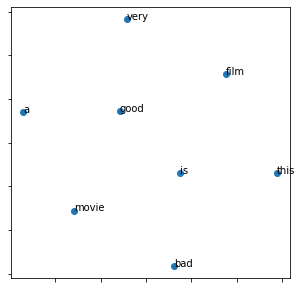

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Problem 5

In [69]:
import re
for i, s in enumerate(x_train):
    if 'www' in s:
        print(i)
        print(s)
        break

38
I don't hand out "ones" often, but if there was ever a film that deserved this sort of attention, it's "Gas!" This is self-indulgent crap that reaches for some of the ambiance of M*A*S*H and falls completely flat on its face in the attempt.<br /><br />I see what Corman was going for - Malcolm Marmorstein and Elliott Gould tried to reproduce Gould's deathless role in the original movie version of M*A*S*H with a similar plot (in the movie "Whiffs" - look it up here in IMDb, http://www.imdb.com/title/tt0073891/ for more information).<br /><br />Marmorstein and Gould got closer to the brass ring with "Whiffs" than Corman did with "Gas!" but didn't quite get there. Neither one of those films even got close to the success of M*A*S*H.<br /><br />What's wrong with "Gas!"? What isn't? No one comes close to really acting at a level above junior high school theatrics. The production values stink. Someone else here mentioned the magically regenerating headlights on a getaway car, and there's mo

In [70]:
no_preprocessing = x_train[38]
after_preprocessing1 = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", no_preprocessing) 
after_preprocessing2 = re.sub(r'<[^>]+>', " ", after_preprocessing1) 
after_preprocessing3 = re.sub(r"[^0-9a-zA-Z ]", "", after_preprocessing2) 
after_preprocessing = after_preprocessing3.lower() 
after_preprocessing

'i dont hand out ones often but if there was ever a film that deserved this sort of attention its gas this is selfindulgent crap that reaches for some of the ambiance of mash and falls completely flat on its face in the attempt  i see what corman was going for  malcolm marmorstein and elliott gould tried to reproduce goulds deathless role in the original movie version of mash with a similar plot in the movie whiffs  look it up here in imdb  for more information  marmorstein and gould got closer to the brass ring with whiffs than corman did with gas but didnt quite get there neither one of those films even got close to the success of mash  whats wrong with gas what isnt no one comes close to really acting at a level above junior high school theatrics the production values stink someone else here mentioned the magically regenerating headlights on a getaway car and theres more of that lack of attention to detail nothing works the way its supposed to in this film and nobody cares  gas actu

## Problem 6

In [73]:
model = Word2Vec(min_count=1, size=10) 
model.build_vocab(after_preprocessing) 
model.train(after_preprocessing, total_examples=model.corpus_count, epochs=model.iter)

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(1390, 8460)